## Kümeleme Analizi
https://en.wikipedia.org/wiki/Cluster_analysis#Applications

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [12]:
# Veri setini oku
df = pd.read_csv("https://raw.githubusercontent.com/yasarkucukefe/YBS_405/main/data/penguins.csv")

In [13]:
df.head()

,y,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
3,Adelie,36.7,19.3,193.0,3450.0
4,Adelie,39.3,20.6,190.0,3650.0


In [14]:
# dataframe'den 100 tane seç
print(df.shape)
df = df.sample(n=80)
print(df.shape)

(342, 5)
(80, 5)


In [15]:
y = df.y # Penguen türü
df = df.drop('y', axis=1) # y kolonu drop

In [18]:
#SciPy ile kümeleme
hc = linkage(df, method="centroid", metric="euclidean")

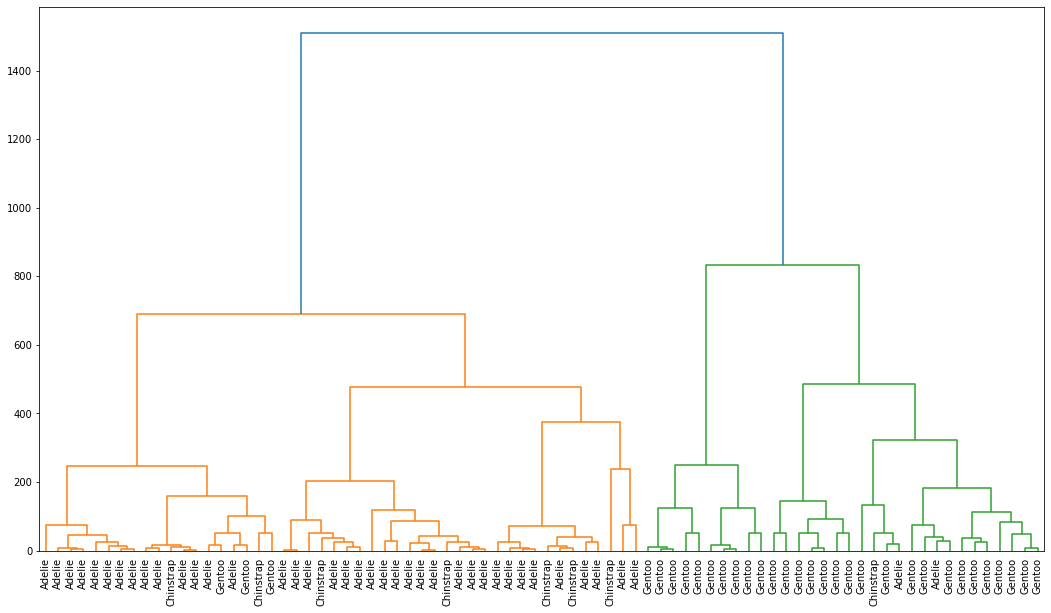

In [19]:
fig = plt.figure(figsize=(18,10))
dn = dendrogram(hc, leaf_label_func=lambda id: y.values[id], leaf_font_size=10)

In [20]:
# Sklearn ile
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

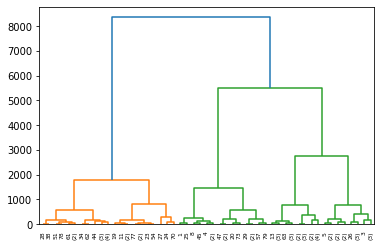

In [23]:
model = AgglomerativeClustering(distance_threshold=10, n_clusters=None)
model = model.fit(df)
plot_dendrogram(model, truncate_mode='level', p=5)

## K-means (K-ortalama) kümelemesi
https://en.wikipedia.org/wiki/K-means_clustering

In [24]:
import pandas as pd                               # For dataframes
import matplotlib.pyplot as plt                   # For plotting data
import seaborn as sns                             # For plotting data
from sklearn.cluster import KMeans                # For k-Means
from sklearn.model_selection import GridSearchCV  # For grid search
from sklearn.metrics import silhouette_score      # For metrics and scores
from sklearn.preprocessing import StandardScaler  # For standardizing data

In [25]:
# Veri setini oku
df = pd.read_csv("https://raw.githubusercontent.com/yasarkucukefe/YBS_405/main/data/penguins.csv")

In [26]:
y = df.y
df = df.drop('y',axis=1)

In [27]:
df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,36.7,19.3,193.0,3450.0
4,39.3,20.6,190.0,3650.0


In [28]:
df_org = df.copy()

In [29]:
# fit-transform => StandartScaler() => kolon ortalaması=>0, kolon standart sapması =>1
df = pd.DataFrame(StandardScaler().fit_transform(df),columns=df.columns)

In [30]:
df.mean()

bill_length_mm       1.662088e-16
bill_depth_mm        4.155221e-16
flipper_length_mm   -8.310441e-16
body_mass_g          8.310441e-17
dtype: float64

In [33]:
df.std()

bill_length_mm       1.001465
bill_depth_mm        1.001465
flipper_length_mm    1.001465
body_mass_g          1.001465
dtype: float64

In [34]:
y.unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

## Scree Plot
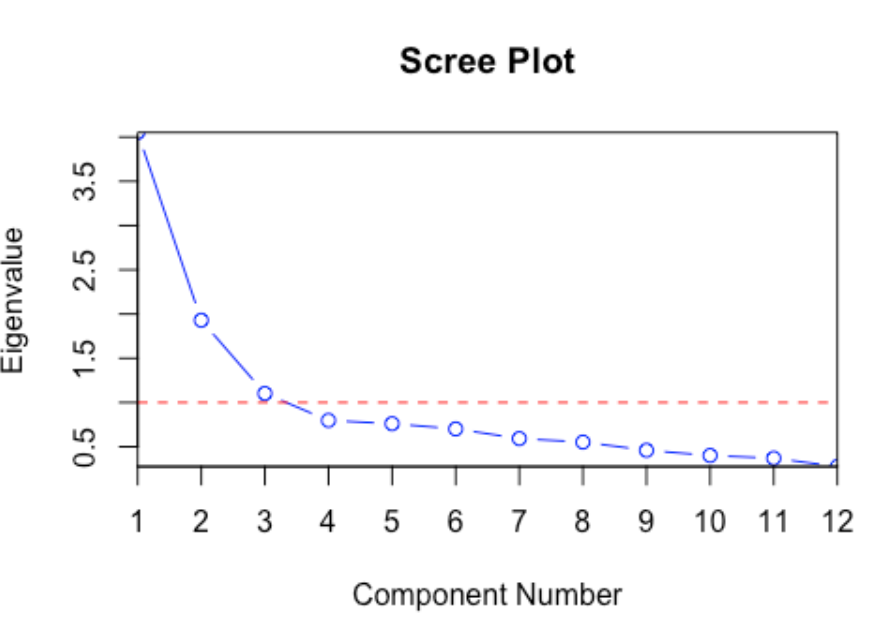
Resimdeki veri seti 3 tane kümeden oluşmaktadır.

In [35]:
from sklearn.decomposition import PCA

In [38]:
pca = PCA(n_components=4)

In [39]:
pca.fit(df)

PCA(n_components=4)

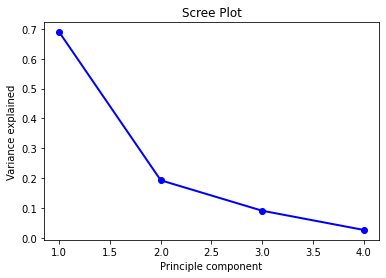

In [43]:
pc_values = np.arange(pca.n_components_) + 1
plt.plot(pc_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title("Scree Plot")
plt.xlabel('Principle component')
plt.ylabel('Variance explained')
plt.show()

In [44]:
# Grafikten 2 tane ana küme olduğu söylenebilir

In [45]:
# K-means
km = KMeans(n_clusters=2, init='k-means++', n_init=10)

In [46]:
km.fit(df)

KMeans(n_clusters=2)

In [47]:
km.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 2,
 'n_init': 10,
 'n_jobs': 'deprecated',
 'precompute_distances': 'deprecated',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

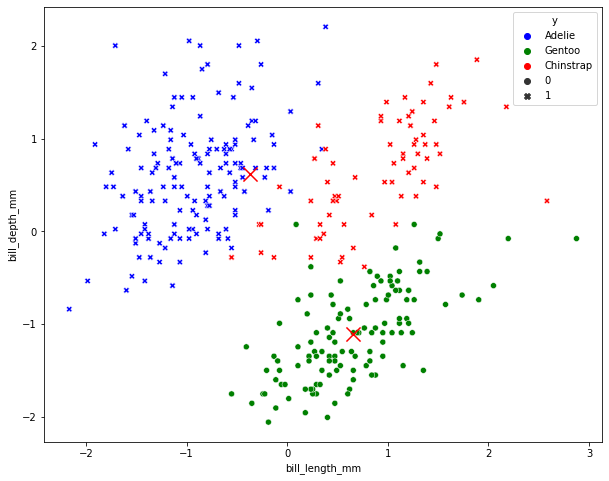

In [51]:
fig = plt.figure(figsize=(10,8))
sns.scatterplot(x=df.columns[0], y=df.columns[1],data=df, hue=y, style=km.labels_, palette=['blue','green','red'])
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], marker='x', s=200, c='red')

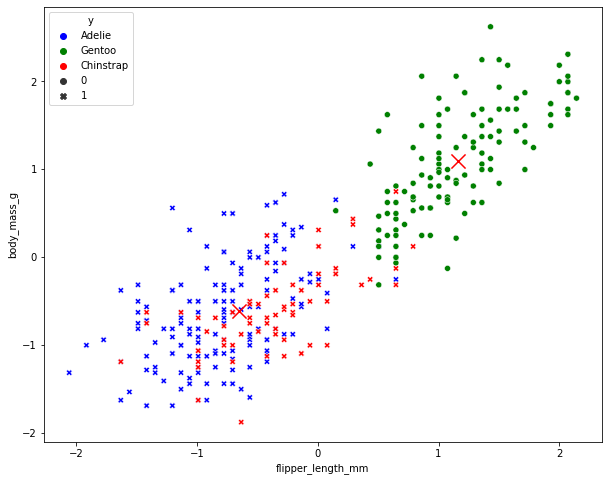

In [53]:
fig = plt.figure(figsize=(10,8))
sns.scatterplot(x=df.columns[2], y=df.columns[3],data=df, hue=y, style=km.labels_, palette=['blue','green','red'])
plt.scatter(km.cluster_centers_[:,2],km.cluster_centers_[:,3], marker='x', s=200, c='red')

In [49]:
km.cluster_centers_

array([[ 0.65722922, -1.09998045,  1.15886506,  1.0917612 ],
       [-0.36912874,  0.61779724, -0.65086942, -0.61318095]])

## DBSCAN
https://en.wikipedia.org/wiki/DBSCAN
### Density Based Spatial Clustering of Applications with Noise
https://towardsdatascience.com/dbscan-clustering-explained-97556a2ad556

In [54]:
import pandas as pd                               # For dataframes
import matplotlib.pyplot as plt                   # For plotting data
import seaborn as sns                             # For plotting data
from sklearn.cluster import DBSCAN                # For DBSCAN
import numpy as np                                # For various computations
from sklearn.preprocessing import StandardScaler  # For standardizing data    
from sklearn.neighbors import NearestNeighbors    # For nearest neighbors

In [55]:
df = pd.read_csv('https://raw.githubusercontent.com/yasarkucukefe/YBS_405/main/data/penguins.csv')
y = df.y
df = df.drop('y',axis=1)
df = pd.DataFrame(StandardScaler().fit_transform(df),columns=df.columns)

In [81]:
# 1. adım: Parametrelerin belirlenmesi 

k = 20 # minimum ortak komşu sayısı
nn= NearestNeighbors(n_neighbors=k).fit(df)


In [82]:
# en yakın k komşunun mesafesini hesapla
dist, ind = nn.kneighbors(df)

In [83]:
#sıralama adımı
dist = np.sort(dist,axis=0)[:,1]

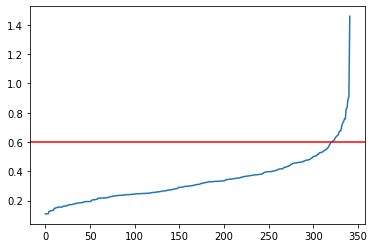

In [84]:
plt.plot(dist)
plt.axhline(y=0.6, color='red')

## eps = 0.6

In [85]:
db = DBSCAN(eps=0.6, min_samples=k).fit(df)

In [86]:
db.labels_

array([-1,  0,  0,  0, -1,  0, -1,  0, -1,  0, -1,  0, -1, -1,  0,  0, -1,
        0, -1, -1, -1,  0,  0, -1,  0, -1,  0, -1, -1, -1, -1,  0, -1,  0,
       -1, -1, -1, -1, -1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1,  0, -1,
        0, -1, -1, -1,  0,  0, -1,  0,  0, -1,  0, -1, -1, -1,  0, -1,  0,
       -1, -1,  0, -1, -1,  0, -1,  0, -1,  0, -1,  0, -1,  0, -1,  0, -1,
        0,  0,  0,  0, -1, -1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1,
       -1, -1,  0, -1, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0,  0,
        0, -1, -1, -1, -1, -1,  0, -1,  0, -1,  0, -1,  0, -1,  0,  0,  0,
       -1,  0, -1,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0, -1,  1, -1,
        1, -1,  1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  1, -1, -1, -1,  1,
        1, -1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1, -1,
        1, -1,  1, -1, -1, -1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1, -1,  1, -1,  1, -1,
        1,  1,  1,  1,  1

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

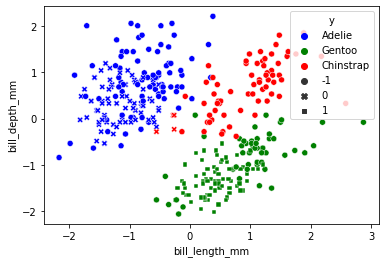

In [87]:
sns.scatterplot(x=df.columns[0],y=df.columns[1], data=df, hue=y, style=db.labels_, palette=['blue','green','red'] )

In [88]:
y_pred = db.fit_predict(df)

Text(0.5, 1.0, 'Clusters determined by DBSCAN')

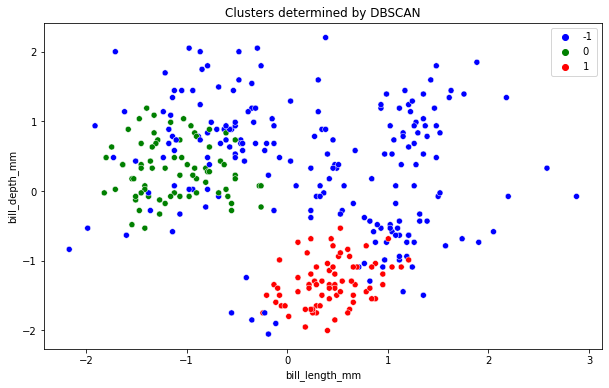

In [90]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df.columns[0],y=df.columns[1], data=df, hue=y_pred, palette=['blue','green','red'] )
plt.title("Clusters determined by DBSCAN")